In [ ]:
# Aluno(a): Gabrielle da Silva Veríssimo
# Matrícula:20190096090

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get update
!apt-get install unrar

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [81.0 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,014 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelea

In [2]:
#Descompacta Sinais.rar
!unrar x "drive/My Drive/UFPB/Aprendizagem-de-maquina/prova/Sinais.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from drive/My Drive/UFPB/Aprendizagem-de-maquina/prova/Sinais.rar

Creating    Sinais                                                    OK
Extracting  Sinais/Escola_EL_2.json                                        0%  OK 
Extracting  Sinais/Disciplina_Dannubia_7.json                              0%  OK 
Extracting  Sinais/Ângulo_RL_5.json                                        0%  OK 
Extracting  Sinais/Capítulo_Dannubia_10.json                               0%  OK 
Extracting  Sinais/Apostila_JMLF_1.json                                    0%  OK 
Extracting  Sinais/Coesão_JMLF_3.json                                      0%  OK 
Extracting  Sinais/Dicionário_TS_8.json                                    0%  OK 
Extracting  Sinais/História_RL_2.json                                      0%  OK 
Extracting  Sinais/Classe_MA_3.json  

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


#Pré-processamento dos dados

In [4]:
signs = pd.read_csv('/content/sinais.csv', sep=",")

#Retorna as 5 primeiras linhas do arquivo e vemos que há 7 colunas
signs.head()

,file_name,width,height,duration_sec,num_frames,sinal,interprete
0,Adição_AP_10.json,738,1008,4.533333,136,Adição,Alexson
1,Adição_AP_1.json,774,1006,4.766667,143,Adição,Alexson
2,Adição_AP_2.json,760,1002,4.433333,133,Adição,Alexson
3,Adição_AP_3.json,762,1000,4.933333,148,Adição,Alexson
4,Adição_AP_4.json,764,1004,4.600000,138,Adição,Alexson


In [5]:
#Vemos que cada coluna tem 2052 valores não nulos menos a coluna 'file_name', ou seja, está faltando um nome
signs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   file_name     2501 non-null   object 
 1   width         2502 non-null   int64  
 2   height        2502 non-null   int64  
 3   duration_sec  2502 non-null   float64
 4   num_frames    2502 non-null   int64  
 5   sinal         2502 non-null   object 
 6   interprete    2502 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 137.0+ KB


In [6]:
#Procura a linha que tem o dado faltante
row_with_missing_data = signs[signs.isnull().any(axis=1)]
row_with_missing_data

,file_name,width,height,duration_sec,num_frames,sinal,interprete
565,NaN,632,860,5.166667,155,Bolsa de Estudos,Cecilia


In [7]:
# Filtra as linhas da coluna 'sinal' que tem o valor 'Bolsa de Estudos' e a coluna 'interprete' que tem o valor 'Cecilia'
#para saber o padrão dos nomes da coluna 'file_name'
rows_bolsa_de_estudos_cecilia = signs[(signs['sinal'] == 'Bolsa de Estudos') & (signs['interprete'] == 'Cecilia')]
rows_bolsa_de_estudos_cecilia

,file_name,width,height,duration_sec,num_frames,sinal,interprete
562,Bolsa de estudo_CS_10.json,634,858,7.033333,211,Bolsa de Estudos,Cecilia
563,Bolsa de estudo_CS_1.json,644,858,3.133333,94,Bolsa de Estudos,Cecilia
564,Bolsa de estudo_CS_2.json,648,860,5.166667,155,Bolsa de Estudos,Cecilia
565,NaN,632,860,5.166667,155,Bolsa de Estudos,Cecilia
566,Bolsa de estudo_CS_4.json,640,860,5.133333,154,Bolsa de Estudos,Cecilia
567,Bolsa de estudo_CS_5.json,624,858,4.600000,138,Bolsa de Estudos,Cecilia
568,Bolsa de estudo_CS_6.json,654,858,4.933333,148,Bolsa de Estudos,Cecilia
569,Bolsa de estudo_CS_7.json,640,858,4.966667,149,Bolsa de Estudos,Cecilia
570,Bolsa de estudo_CS_8.json,646,860,5.133333,154,Bolsa de Estudos,Cecilia
571,Bolsa de estudo_CS_9.json,634,858,4.466667,134,Bolsa de Estudos,Cecilia


In [8]:
# Preenche a linha com o valor faltante
signs.loc[565, 'file_name'] = "Bolsa de estudo_CS_3.json"
print(signs.loc[565])

file_name       Bolsa de estudo_CS_3.json
width                                 632
height                                860
duration_sec                     5.166667
num_frames                            155
sinal                    Bolsa de Estudos
interprete                        Cecilia
Name: 565, dtype: object


In [9]:
#Procurando dados duplicados
dup=signs.duplicated()
sum(dup)

0

In [10]:
json_folder_path = '/content/Sinais'

all_json_data = []

# Lê todos os arquivos .json da pasta Sinais e salva os dados junto com o nome do arquivo em um dicionario
for filename in os.listdir(json_folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(json_folder_path, filename)
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                all_json_data.append({'file_name': filename, 'data': data})
        except json.JSONDecodeError:
            print(f"Error decoding JSON from {filename}")
        except FileNotFoundError:
            print(f"Error: {filename} not found.")
        except Exception as e:
            print(f"An error occurred while reading {filename}: {e}")

In [11]:
print(f"Tamanho do array: {len(all_json_data)}.")
print(all_json_data[0])

Tamanho do array: 2501.
{'file_name': 'Física_AP_5.json', 'data': {'frames': [{'frame': 0, 'keypoints': [{'id': 0, 'x': 198, 'y': 67, 'z': -1.61, 'visibility': 1.0}, {'id': 1, 'x': 210, 'y': 56, 'z': -1.53, 'visibility': 1.0}, {'id': 2, 'x': 215, 'y': 57, 'z': -1.53, 'visibility': 1.0}, {'id': 3, 'x': 220, 'y': 58, 'z': -1.53, 'visibility': 1.0}, {'id': 4, 'x': 188, 'y': 55, 'z': -1.54, 'visibility': 1.0}, {'id': 5, 'x': 181, 'y': 56, 'z': -1.54, 'visibility': 1.0}, {'id': 6, 'x': 175, 'y': 57, 'z': -1.54, 'visibility': 1.0}, {'id': 7, 'x': 228, 'y': 68, 'z': -1.0, 'visibility': 1.0}, {'id': 8, 'x': 167, 'y': 66, 'z': -1.03, 'visibility': 1.0}, {'id': 9, 'x': 210, 'y': 87, 'z': -1.41, 'visibility': 1.0}, {'id': 10, 'x': 184, 'y': 87, 'z': -1.41, 'visibility': 1.0}, {'id': 11, 'x': 280, 'y': 179, 'z': -0.66, 'visibility': 1.0}, {'id': 12, 'x': 116, 'y': 179, 'z': -0.68, 'visibility': 1.0}, {'id': 13, 'x': 299, 'y': 309, 'z': -0.43, 'visibility': 0.96}, {'id': 14, 'x': 91, 'y': 311, 'z':

Já que há 2501 arquivos .json, significa que Bolsa de estudo_CS_3.json não existe, então temos que remover seu registro do sinais.csv 🤡

In [12]:
#Excluir a linha com os dados do .json faltante
signs = signs.drop(565)

In [13]:
# Verificando o shape para ver se foi removido com sucesso
signs.shape

(2501, 7)

Reprocessa os dados JSON extraindo as coordenadas dos keypoints e a visibilidade de cada quadro e adiciona a média (para representar a posição central de cada id) e o desvio padrão (representa a variação do movimento).

In [14]:
processed_data = []

for item in all_json_data:
    filename = item['file_name']
    json_content = item['data']
    frames = json_content.get('frames', [])
    features = {'file_name': filename}

    if frames:
        # Extrai os keypoints de todos os frames
        all_keypoints = [frame.get('keypoints', []) for frame in frames]

        # Inicializa a lista para guardar as coordenadas e visibilidade de cada id
        keypoint_coords = {} # {id: {'x': [], 'y': [], 'z': [], 'visibility': []}}
        for frame_keypoints in all_keypoints:
            for keypoint in frame_keypoints:
                keypoint_id = keypoint.get('id')
                if keypoint_id is not None:
                    if keypoint_id not in keypoint_coords:
                        keypoint_coords[keypoint_id] = {'x': [], 'y': [], 'z': [], 'visibility': []}

                    keypoint_coords[keypoint_id]['x'].append(keypoint.get('x'))
                    keypoint_coords[keypoint_id]['y'].append(keypoint.get('y'))
                    keypoint_coords[keypoint_id]['z'].append(keypoint.get('z'))
                    keypoint_coords[keypoint_id]['visibility'].append(keypoint.get('visibility'))

        # Calcula a média e o desvio padrão para cada coordenada e a visibilidade em todos os quadros para cada keypoint ID
        for keypoint_id, coords in keypoint_coords.items():
            features[f'keypoint_{keypoint_id}_mean_x'] = np.mean(coords['x']) if coords['x'] else 0
            features[f'keypoint_{keypoint_id}_std_x'] = np.std(coords['x']) if coords['x'] else 0
            features[f'keypoint_{keypoint_id}_mean_y'] = np.mean(coords['y']) if coords['y'] else 0
            features[f'keypoint_{keypoint_id}_std_y'] = np.std(coords['y']) if coords['y'] else 0
            features[f'keypoint_{keypoint_id}_mean_z'] = np.mean(coords['z']) if coords['z'] else 0
            features[f'keypoint_{keypoint_id}_std_z'] = np.std(coords['z']) if coords['z'] else 0
            features[f'keypoint_{keypoint_id}_mean_visibility'] = np.mean(coords['visibility']) if coords['visibility'] else 0
            features[f'keypoint_{keypoint_id}_std_visibility'] = np.std(coords['visibility']) if coords['visibility'] else 0

    processed_data.append(features)

processed_df = pd.DataFrame(processed_data)

In [14]:
processed_df.head()

,file_name,keypoint_0_mean_x,keypoint_0_std_x,keypoint_0_mean_y,keypoint_0_std_y,keypoint_0_mean_z,keypoint_0_std_z,keypoint_0_mean_visibility,keypoint_0_std_visibility,keypoint_1_mean_x,...,keypoint_31_mean_visibility,keypoint_31_std_visibility,keypoint_32_mean_x,keypoint_32_std_x,keypoint_32_mean_y,keypoint_32_std_y,keypoint_32_mean_z,keypoint_32_std_z,keypoint_32_mean_visibility,keypoint_32_std_visibility
0,Física_AP_5.json,192.728070,4.920928,72.868421,7.111287,-1.230789,0.216435,1.0,0.0,203.991228,...,0.006930,0.008698,149.447368,7.876338,800.000000,6.216842,0.474825,0.161562,0.014386,0.015562
1,Física_RL_1.json,530.600000,9.685958,179.111111,9.188694,-1.274000,0.165749,1.0,0.0,552.488889,...,0.010111,0.005269,448.800000,22.648620,1437.377778,10.411081,0.513444,0.143984,0.012000,0.006700
2,Dicionário_CS_2.json,325.243902,13.329679,140.951220,6.577683,-0.791626,0.116559,1.0,0.0,340.528455,...,0.013333,0.011092,294.577236,7.831569,1342.861789,8.979041,0.461707,0.184949,0.012439,0.006545
3,Disciplina_EL_1.json,307.872727,4.602586,170.618182,11.812922,-0.998000,0.095249,1.0,0.0,328.790909,...,0.008364,0.003699,244.963636,13.716564,1645.800000,19.151928,0.648909,0.111896,0.009909,0.000949
4,Estudar_LS_4.json,148.795918,6.151089,50.469388,2.893357,-0.909388,0.260168,1.0,0.0,154.306122,...,0.007143,0.006389,114.448980,6.788529,513.816327,7.471506,0.201224,0.144118,0.011429,0.008081


In [15]:
# Mescla as informações do sinais.csv com os arquivos json correspondentes
combined_data = pd.merge(signs, processed_df, on='file_name', how='inner')

combined_data.head()

,file_name,width,height,duration_sec,num_frames,sinal,interprete,keypoint_0_mean_x,keypoint_0_std_x,keypoint_0_mean_y,...,keypoint_31_mean_visibility,keypoint_31_std_visibility,keypoint_32_mean_x,keypoint_32_std_x,keypoint_32_mean_y,keypoint_32_std_y,keypoint_32_mean_z,keypoint_32_std_z,keypoint_32_mean_visibility,keypoint_32_std_visibility
0,Adição_AP_10.json,738,1008,4.533333,136,Adição,Alexson,419.308824,5.268545,190.963235,...,0.006324,0.005397,369.044118,24.982602,1681.735294,29.199928,0.461544,0.283385,0.013529,0.010256
1,Adição_AP_1.json,774,1006,4.766667,143,Adição,Alexson,442.692308,6.119133,187.951049,...,0.007273,0.005816,409.615385,28.399971,1714.405594,24.827021,0.526643,0.146521,0.020280,0.013890
2,Adição_AP_2.json,760,1002,4.433333,133,Adição,Alexson,439.075188,7.156283,188.413534,...,0.005789,0.004937,407.060150,26.163672,1689.000000,22.797573,0.517895,0.118703,0.016165,0.012246
3,Adição_AP_3.json,762,1000,4.933333,148,Adição,Alexson,440.195946,6.132169,188.554054,...,0.006149,0.005003,413.222973,22.364251,1696.385135,22.961343,0.495743,0.110839,0.018919,0.013514
4,Adição_AP_4.json,764,1004,4.600000,138,Adição,Alexson,439.000000,5.992749,189.536232,...,0.006232,0.004846,410.057971,24.062650,1704.202899,20.541637,0.484565,0.123565,0.019493,0.013690


In [16]:
combined_data.shape

(2501, 271)

Criação dos conjuntos de treinamento e teste

In [17]:
# Exclui 'file_name'e 'interprete' porque não são relevantes para o treinamentos e 'sinais' porque é o label e vai ficar em y
x = combined_data.drop(['file_name', 'sinal', 'interprete'], axis=1)
y = combined_data['sinal']

# Separa o dataset de treino e o dataset de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35)

print("Shape de X_train:", x_train.shape)
print("Shape de X_test:", x_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (2000, 268)
Shape de X_test: (501, 268)
Shape de y_train: (2000,)
Shape de y_test: (501,)


In [18]:
scaler = StandardScaler()

# Normalizando colunas de x_train
x_train_scaled = scaler.fit_transform(x_train)

# Normalizando colunas de x_test
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled_df.describe()

,width,height,duration_sec,num_frames,keypoint_0_mean_x,keypoint_0_std_x,keypoint_0_mean_y,keypoint_0_std_y,keypoint_0_mean_z,keypoint_0_std_z,...,keypoint_31_mean_visibility,keypoint_31_std_visibility,keypoint_32_mean_x,keypoint_32_std_x,keypoint_32_mean_y,keypoint_32_std_y,keypoint_32_mean_z,keypoint_32_std_z,keypoint_32_mean_visibility,keypoint_32_std_visibility
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-5.329071e-18,6.572520e-17,1.421085e-17,-1.083578e-16,3.197442e-17,-1.421085e-17,-3.730349e-17,-1.652012e-16,1.053380e-15,-5.329071e-18,...,5.506706e-17,-5.329071e-18,-5.035972e-16,-3.907985e-17,6.838974e-17,-2.309264e-17,-4.352074e-17,2.189360e-16,7.815970e-17,-1.918465e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.528433e+00,-1.543403e+00,-2.235404e+00,-2.235404e+00,-1.561941e+00,-1.180730e+00,-1.574383e+00,-1.423777e+00,-3.056175e+00,-1.884398e+00,...,-8.746653e-01,-7.403556e-01,-1.580084e+00,-1.645160e+00,-1.532314e+00,-1.263508e+00,-3.388728e+00,-1.704872e+00,-1.091904e+00,-9.391848e-01
25%,-7.307651e-01,-7.869010e-01,-6.980121e-01,-6.980121e-01,-7.143485e-01,-7.183975e-01,-6.960053e-01,-8.265996e-01,-6.941130e-01,-7.743048e-01,...,-5.047720e-01,-3.541208e-01,-7.325849e-01,-6.610448e-01,-8.065061e-01,-7.261692e-01,-6.147081e-01,-7.325856e-01,-5.648327e-01,-4.409238e-01
50%,-1.198205e-01,-2.655811e-01,-2.540300e-02,-2.540300e-02,-1.650707e-01,-2.691460e-01,-2.088712e-01,-2.010856e-01,1.227492e-01,-1.218168e-01,...,-1.901510e-01,-2.553136e-01,-1.426179e-01,-2.099949e-01,-2.461967e-01,-2.299371e-01,-5.873605e-03,-2.136291e-01,-1.865663e-01,-3.282512e-01
75%,5.353480e-01,6.869056e-01,6.231843e-01,6.231843e-01,7.140142e-01,3.872137e-01,9.702106e-01,6.355757e-01,7.573635e-01,6.622423e-01,...,1.855914e-01,1.342977e-01,6.900878e-01,4.720916e-01,6.011920e-01,3.926238e-01,6.299297e-01,5.201469e-01,2.658446e-01,1.399036e-01
max,4.040499e+00,2.152873e+00,5.139274e+00,5.139274e+00,3.393696e+00,5.205398e+00,4.108944e+00,4.344641e+00,2.720303e+00,3.994063e+00,...,1.357710e+01,1.662911e+01,3.831781e+00,6.222390e+00,2.044282e+00,7.532546e+00,2.879866e+00,5.422916e+00,1.243050e+01,1.240299e+01


In [ ]:
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_scaled_df.describe()

,width,height,duration_sec,num_frames,keypoint_0_mean_x,keypoint_0_std_x,keypoint_0_mean_y,keypoint_0_std_y,keypoint_0_mean_z,keypoint_0_std_z,...,keypoint_31_mean_visibility,keypoint_31_std_visibility,keypoint_32_mean_x,keypoint_32_std_x,keypoint_32_mean_y,keypoint_32_std_y,keypoint_32_mean_z,keypoint_32_std_z,keypoint_32_mean_visibility,keypoint_32_std_visibility
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,-0.014784,-0.020846,-0.017588,-0.017588,-0.003630,-0.029881,-0.036178,-0.014752,-0.004909,-0.069770,...,-0.081823,-0.054604,0.005669,-0.027093,-0.013020,-0.074379,0.014785,-0.060089,-0.050122,-0.046728
std,0.962593,0.978651,0.968348,0.968348,0.983260,0.910543,0.956873,0.982984,1.044207,1.000215,...,0.831899,0.749272,0.998743,0.940071,0.981074,0.885187,1.034909,0.956677,0.926680,0.850537
min,-1.502226,-1.539483,-1.827035,-1.827035,-1.541979,-1.149880,-1.581341,-1.368815,-3.131140,-1.883812,...,-0.874665,-0.740356,-1.567977,-1.420556,-1.530067,-1.229582,-3.277342,-1.725853,-1.091904,-0.939185
25%,-0.709472,-0.786901,-0.722034,-0.722034,-0.711265,-0.687817,-0.692316,-0.851592,-0.742980,-0.831686,...,-0.631527,-0.381813,-0.703854,-0.636598,-0.803165,-0.696065,-0.586660,-0.725861,-0.610184,-0.467428
50%,-0.093614,-0.198946,-0.025403,-0.025403,-0.147762,-0.269880,-0.195045,-0.205447,0.141240,-0.212283,...,-0.247336,-0.255841,-0.149329,-0.236396,-0.201134,-0.265658,0.029043,-0.234446,-0.229555,-0.355827
75%,0.509141,0.620271,0.599163,0.599163,0.647145,0.419348,0.850706,0.651441,0.831866,0.565613,...,0.166103,0.099245,0.663684,0.391676,0.518999,0.296315,0.624647,0.412173,0.294074,0.140043
max,3.693260,2.019603,3.025360,3.025360,3.394031,4.743469,3.321717,3.732677,2.493118,3.188238,...,6.012759,7.936965,3.582263,5.728816,1.948339,3.686099,2.692790,4.821675,6.174515,8.510860


# Treinamento do modelo de árvore de decisão (Random Forest)

Configura e executa uma Busca Aleatória com Validação Cruzada para encontrar os melhores hiperparâmetros para um modelo RandomForestClassifier.

In [ ]:

# cria grid search
seed = 15
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# define os parametros do grid
param_grid = {'n_estimators': [100, 512], #nº de árvores na floresta
             'max_features' : ['sqrt', 'log2', 7], #O número de atributos a serem considerados ao procurar a melhor divisão em cada nó
              'max_depth' : [None, 5, 10], #Ajuda a controlar o overfitting, limita a profundidade máxima de cada árvore na floresta
              'min_samples_split': [2, 5, 10], #O número mínimo de amostras necessárias para dividir um nó interno em cada árvore
              'min_samples_leaf': [1, 2, 4], #O número mínimo de amostras que devem estar em um nó folha em cada árvore
              'criterion' : ['entropy','gini'],#define a função para medir a qualidade de uma divisão em cada árvore individual
              'class_weight' : ['balanced',None], #Para lidar com classes desbalanceadas
              'warm_start': [False, True],
             'random_state' : [42]
             }

grid = RandomizedSearchCV(RandomForestClassifier(),
                    param_distributions=param_grid,
                    n_iter=100,
                    cv=kfold,
                    scoring=scoring,
                    return_train_score=True,
                    n_jobs=-1,
                    verbose=1,
                    refit="Accuracy")

%time best_model = grid.fit(x_train_scaled,y_train)

best_log = grid.best_estimator_
print(best_log)
print("_"*40)
print("Score da aprendizagem", np.abs(grid.best_score_))
print("_"*40)
print("*"*40)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 

CPU times: user 54.3 s, sys: 2.08 s, total: 56.3 s
Wall time: 1h 6min 27s
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=512, random_state=42,
                       warm_start=True)
________________________________________
Score da aprendizagem 0.9865
________________________________________
****************************************


Usa as bases de teste para medir acurácia do modelo

In [ ]:
predictions = best_log.predict(x_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do teste via accuracy_score:", accuracy )

Acurácia do teste via accuracy_score: 0.9800399201596807


Avaliação do modelo com F1-score e Matriz de confusão

In [ ]:
# Calculo F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1-score (weighted): {f1}")

F1-score (weighted): 0.9803922210166431


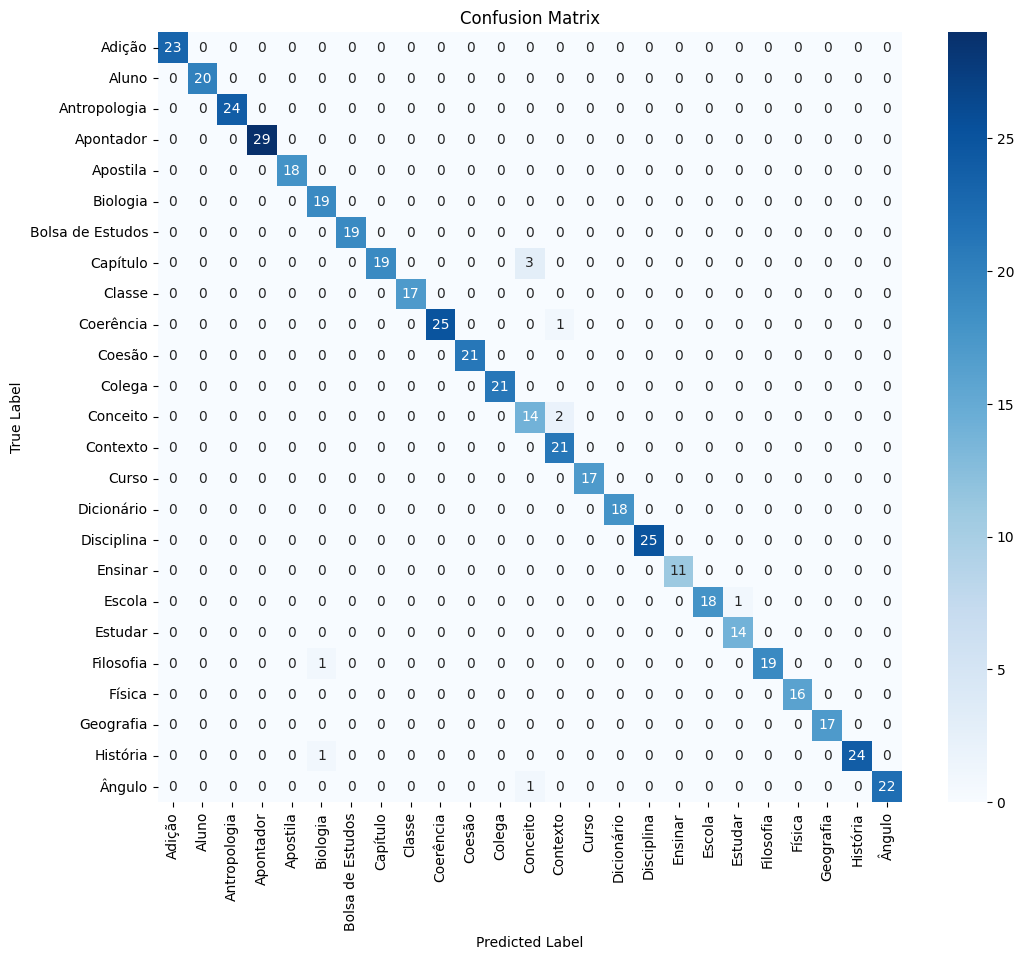

In [ ]:
# Calculo Matriz de confusão
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_log.classes_, yticklabels=best_log.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Modelo KNN

In [19]:
# Parâmetros do algoritmo
k_values = np.array([1,2,3,4,5])
weights = ["uniform","distance"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean','manhattan','minkowski']

# Quantidade de folds a ser utilizado no Cross-Validation
num_folds = 5

# define os hiperparâmetros
parametros = {"n_neighbors":k_values,
              "weights":weights,
              "algorithm":algorithm,
              "metric":metric,
             }

# instancia o modelo
model = KNeighborsClassifier()

# métrica de avaliação a ser usada
scoring = 'accuracy'

# Grid Search com cross-validation usando StratifiedKFold
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model,
                    param_grid=parametros,
                    scoring=scoring,
                    cv=kfold,
                    n_jobs=-1)

In [20]:
# treinamento do modelo
%time best_model = grid.fit(x_train_scaled, y_train)

CPU times: user 1.32 s, sys: 177 ms, total: 1.5 s
Wall time: 1min 43s


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345
    nan 0.971     nan 0.971     nan 0.963     nan 0.9595    nan 0.9515
 0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345
 0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345
 0.971  0.971  0.957  0.971  0.9615 0.963  0.948  0.9595 0.941  0.9515
 0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345
 0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345
 0.971  0.971  0.957  0.971  0.9615 0.963  0.948  0.9595 0.941  0.9515
 0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345
 0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345
    nan 0.971     nan 0.971     nan 0.963     nan 0.9595    nan 0.9515
 0.9565 0.9565 0.9355 0.9565 0.9405 0.9465 0.931  0.9445 0.92   0.9345]
  warn

In [21]:
print("Melhores parâmetros encontrados:")
print(best_model.best_params_)
print("_"*40)
print("Melhor score de acurácia:", np.abs(best_model.best_score_))
print("_"*40)
print("*"*40)

Melhores parâmetros encontrados:
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': np.int64(1), 'weights': 'distance'}
________________________________________
Melhor score de acurácia: 0.9710000000000001
________________________________________
****************************************


In [22]:
predictions = best_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do teste via accuracy_score:", accuracy )

Acurácia do teste via accuracy_score: 0.9800399201596807


In [23]:
# Calculo F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1-score (weighted): {f1}")

F1-score (weighted): 0.9799768061777742


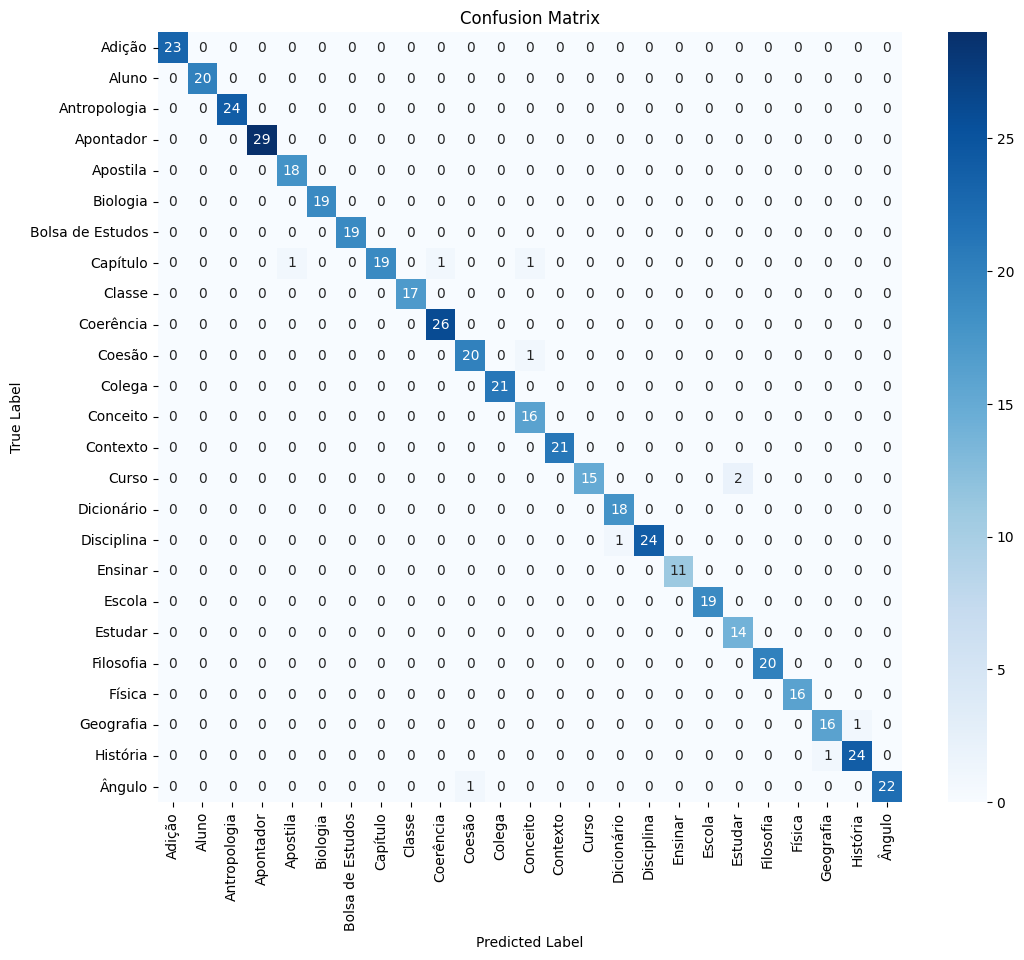

In [25]:
# Calculo Matriz de confusão
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Modelo MLP

In [51]:
# Estrutura da rede:
# Camada de Entrada:  25
# Camada Oculta 1: 120 neurônios.
# Camada Oculta 2: 64 neurônios.
# Camada Oculta 3: 32 neurônios.
# Camada Oculta 4: 16 neurônios.
# Camada Oculta 5: 8 neurônios

mlp = MLPClassifier(hidden_layer_sizes=(120, 64, 32, 16, 8), activation="relu", max_iter=100,random_state=1)

mlp.fit(x_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(120, 64, 32, 16, 8), max_iter=100,
              random_state=1)

In [52]:
predictions = mlp.predict(x_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do teste via accuracy_score:", accuracy)

Acurácia do teste via accuracy_score: 0.9121756487025948


In [53]:
# Calculo F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1-score (weighted): {f1}")

F1-score (weighted): 0.9126038003399942


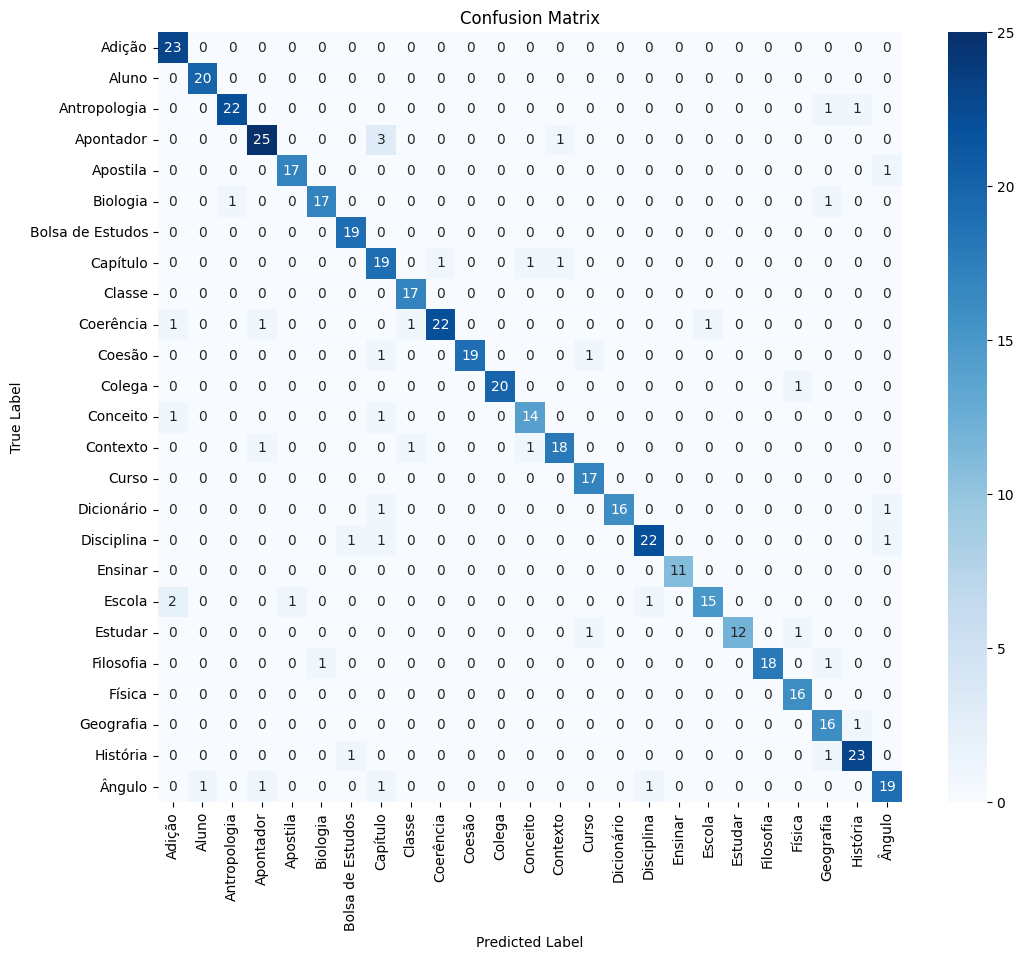

In [54]:
# Calculo Matriz de confusão
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Comparativo de Resultados dos Modelos

Com base nos resultados obtidos:

*   **Random Forest:**
    *   Acurácia do teste: 0.9800
    *   F1-score (weighted): 0.9804

*   **KNN:**
    *   Acurácia do teste: 0.9800
    *   F1-score (weighted): 0.9799

*   **MLP:**
    *   Acurácia do teste: 0.9122
    *   F1-score (weighted): 0.9126

Observa-se que os modelos Random Forest e KNN apresentaram resultados de acurácia e F1-score muito próximos e superiores ao modelo MLP. Isso sugere que para este conjunto de dados e as features extraídas, os modelos baseados em árvores de decisão e vizinhos mais próximos tiveram um desempenho melhor do que a rede neural multicamada com a configuração utilizada.

#Clusterização

## Preparação dos dados


In [69]:
# Utiliza One-Hot Encoding na coluna 'interprete'
interprete_encoded = pd.get_dummies(combined_data['interprete'], prefix='interprete')

# Remove as colunas originais 'file_name', 'sinal' e 'interprete'
X_clustering = combined_data.drop(['file_name', 'sinal', 'interprete'], axis=1)

# Concatena as colunas codificadas com as outras features
X_clustering = pd.concat([X_clustering, interprete_encoded], axis=1)

# Normaliza os dados
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

X_clustering_scaled_df = pd.DataFrame(X_clustering_scaled, columns=X_clustering.columns)


Primeiras 5 linhas dos dados de clusterização normalizados com a coluna 'interprete' codificada:


,width,height,duration_sec,num_frames,keypoint_0_mean_x,keypoint_0_std_x,keypoint_0_mean_y,keypoint_0_std_y,keypoint_0_mean_z,keypoint_0_std_z,...,interprete_Alexson,interprete_Aparecida,interprete_Cecilia,interprete_Dannubia,interprete_Dilainne,interprete_Everton,interprete_Jackeline,interprete_Luana,interprete_Rosenice,interprete_Tiago
0,0.179321,-0.038150,0.534051,0.534051,0.412576,-0.495203,0.056525,0.025262,-0.399456,-1.074894,...,2.994018,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259
1,0.298148,-0.042087,0.703290,0.703290,0.558920,-0.371656,0.022843,0.545474,-0.757634,-0.453279,...,2.994018,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259
2,0.251937,-0.049961,0.461520,0.461520,0.536283,-0.221010,0.028015,0.153427,-0.587597,-0.378305,...,2.994018,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259
3,0.258539,-0.053898,0.824176,0.824176,0.543297,-0.369762,0.029586,0.122895,-0.722295,-0.379304,...,2.994018,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259
4,0.265140,-0.046024,0.582405,0.582405,0.535812,-0.390013,0.040569,0.198020,-0.740316,-0.321481,...,2.994018,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259,-0.333259


In [ ]:
print("Primeiras 5 linhas dos dados de clusterização normalizados com a coluna 'interprete' codificada:")
X_clustering_scaled_df.head()

##k-means

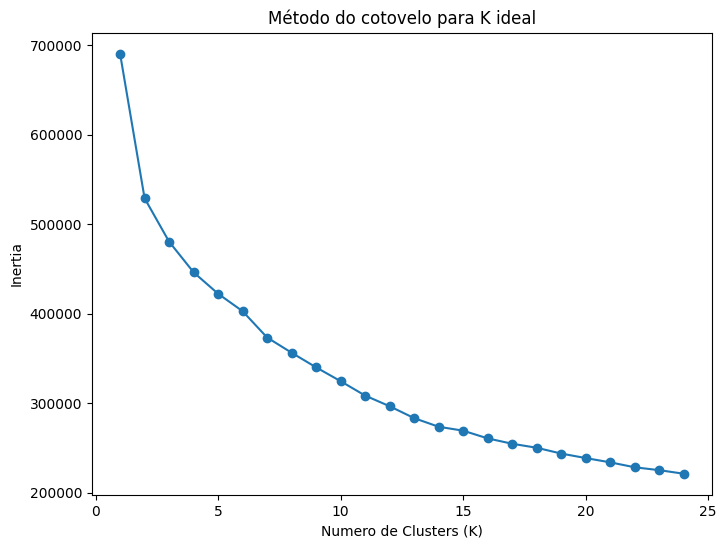

In [78]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(X_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Método do cotovelo (Elbow Method) para encontrar um valor apropriado para K

plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.xlabel("Numero de Clusters (K)")
plt.ylabel("Inertia")
plt.title("Método do cotovelo para K ideal")
plt.show()

In [79]:
# Usa K=7 para o KMeans sugerido pelo metodo do cotovelo.
kmeans = KMeans(n_clusters=7, random_state=1, n_init=10)

# Normalização dos dados
kmeans.fit(X_clustering_scaled)

# Armazenaa os rótulos de cluster atribuídos a cada ponto de dados
cluster_labels = kmeans.labels_

print(cluster_labels[:10])

[3 3 3 3 3 3 3 3 3 3]


##Agrupamento Hierárquico mantendo o mesmo valor de K utilizado no K-means.


In [80]:
from sklearn.cluster import AgglomerativeClustering

hac_ward = AgglomerativeClustering(n_clusters=7, linkage='ward')
hac_ward_labels = hac_ward.fit_predict(X_clustering_scaled)

hac_average = AgglomerativeClustering(n_clusters=7, linkage='average')
hac_average_labels = hac_average.fit_predict(X_clustering_scaled)

print("Ward linkage labels:", hac_ward_labels[:10])
print("Average linkage labels:", hac_average_labels[:10])

Ward linkage labels: [6 6 6 6 6 6 6 6 6 6]
Average linkage labels: [1 1 1 1 1 1 1 1 1 1]


## Avaliar os resultados da clusterização

In [82]:
from sklearn.metrics import silhouette_score

# Calcula pontuação Silhouette para K-means
kmeans_silhouette_score = silhouette_score(X_clustering_scaled, cluster_labels)

# Calcula pontuação Silhouette score para hierarquico com 'ward' linkage
hac_ward_silhouette_score = silhouette_score(X_clustering_scaled, hac_ward_labels)

# Calcula pontuação Silhouette score para hierarquico com 'average' linkage
hac_average_silhouette_score = silhouette_score(X_clustering_scaled, hac_average_labels)

print(f"Silhouette Score for K-means: {kmeans_silhouette_score}")
print(f"Silhouette Score for Hierarchical (Ward): {hac_ward_silhouette_score}")
print(f"Silhouette Score for Hierarchical (Average): {hac_average_silhouette_score}")

Silhouette Score for K-means: 0.1629712322244504
Silhouette Score for Hierarchical (Ward): 0.15276166737450614
Silhouette Score for Hierarchical (Average): 0.38469169110934914


## Comparativo dos Resultados de Clusterização

O Silhouette Score mede quão similar um objeto é ao seu próprio cluster (coesão) comparado com outros clusters (separação). Um score mais alto indica que o objeto está bem compatível com seu próprio cluster e mal compatível com clusters vizinhos. O score varia de -1 a 1, onde:

*   Scores próximos de +1 indicam que as amostras estão bem distantes dos clusters vizinhos.
*   Scores próximos de 0 indicam que as amostras estão perto do limite de decisão entre dois clusters vizinhos.
*   Scores negativos indicam que as amostras podem ter sido atribuídas ao cluster errado.

Aqui estão os Silhouette Scores obtidos para cada método:

*   **K-means:** `0.1629712322244504`
*   **Agrupamento Hierárquico (Ward):** `0.15276166737450614`
*   **Agrupamento Hierárquico (Average):** `0.38469169110934914`

**Análise dos Resultados:**

Com base nos Silhouette Scores, o **Agrupamento Hierárquico com o método de ligação "Average"** obteve o melhor desempenho (`0.3847`), indicando que seus clusters são mais bem definidos e separados em comparação com os outros métodos testados.

O K-means (`0.1630`) e o Agrupamento Hierárquico com "Ward" linkage (`0.1528`) apresentaram scores de Silhueta semelhantes e consideravelmente mais baixos que o "Average" linkage, sugerindo que os clusters formados por esses métodos não são tão claramente separados.

É importante notar que, mesmo o maior Silhouette Score (`0.3847`) não é muito alto (um score mais próximo de 1 seria ideal), o que pode indicar que os clusters não são extremamente distintos nos dados, ou que as features utilizadas não são ideais para separar os sinais em grupos muito coesos e bem separados usando esses algoritmos de clusterização. No entanto, entre os métodos avaliados, o Agrupamento Hierárquico com "Average" linkage foi o que apresentou o melhor resultado segundo esta métrica.

## Visualizando a distribuição dos clusters com PCA

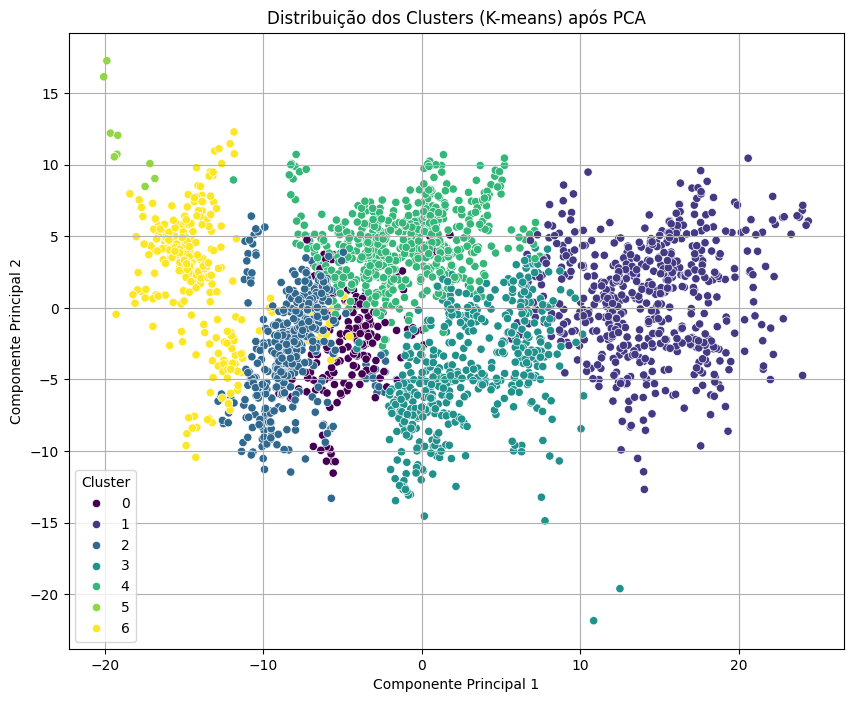

In [84]:
from sklearn.decomposition import PCA

# Reduz a dimensionalidade para 2 componentes principais usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering_scaled)

# Cria um DataFrame com os resultados do PCA e os rótulos de cluster do K-means
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels # Usando os rótulos do K-means

# Plota a distribuição dos clusters nas duas primeiras componentes principais
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('Distribuição dos Clusters (K-means) após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()